In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

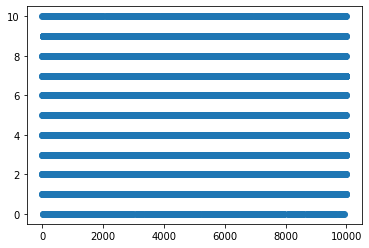

In [ ]:
plt.scatter(df.index,df['Tenure'])
plt.show()

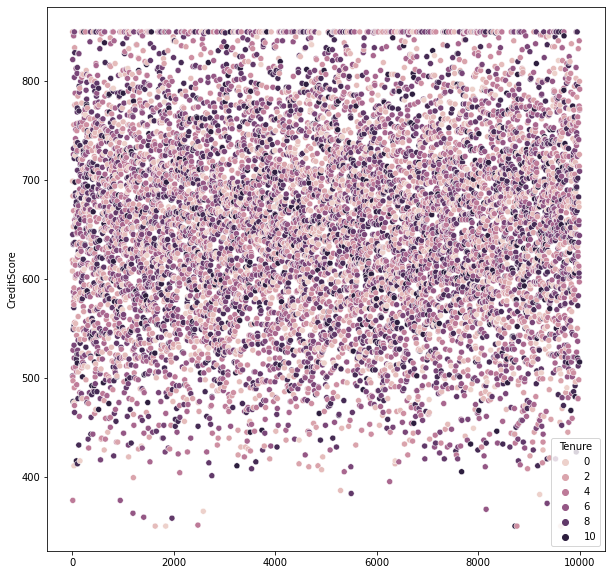

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.index,y=df['CreditScore'],hue=df['Tenure'])

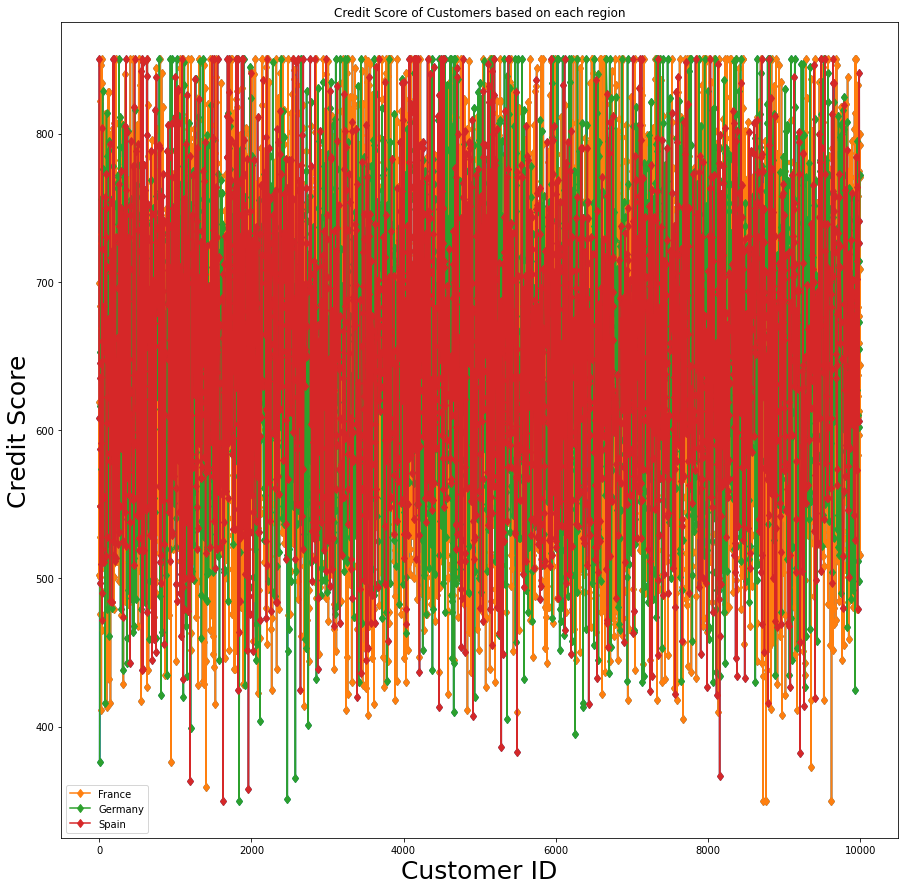

In [14]:
plt.figure(figsize=(15,15))
plt.title('Credit Score of Customers based on each region')
plt.xlabel('Customer ID', fontsize=25)
plt.ylabel('Credit Score', fontsize=25)
plt.plot(df.index, df['CreditScore'],markevery=1,marker='d')
for name,group in df.groupby('Geography'):
  plt.plot(group.index,group['CreditScore'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

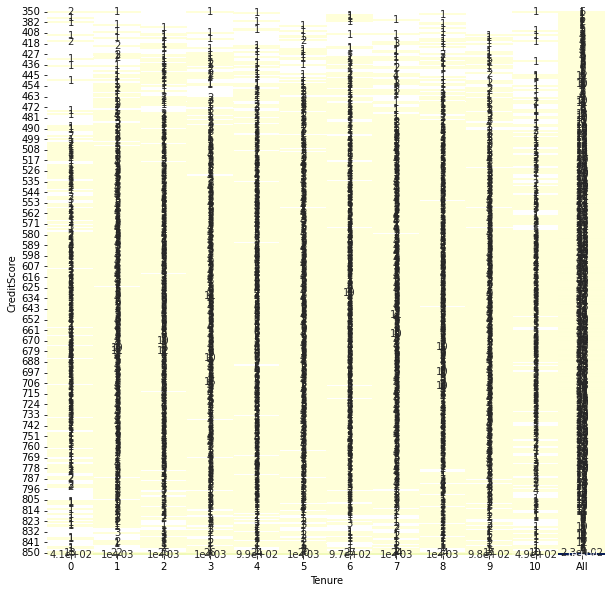

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df['CreditScore'], df['Tenure'], margins=True,     values=df['CustomerId'], aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, cbar=False)


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# checking for Nan values 
df.isna().sum()
# we see there are none , so we can proceed to next step

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
# detecting outliers
data = df['CreditScore'].tolist()
outlier = []
threshold = 3
mean = np.mean(data)
std = np.std(data)
for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score)>threshold:
        outlier.append(i)
print(outlier)

[359, 350, 350, 358, 351, 350, 350, 350]


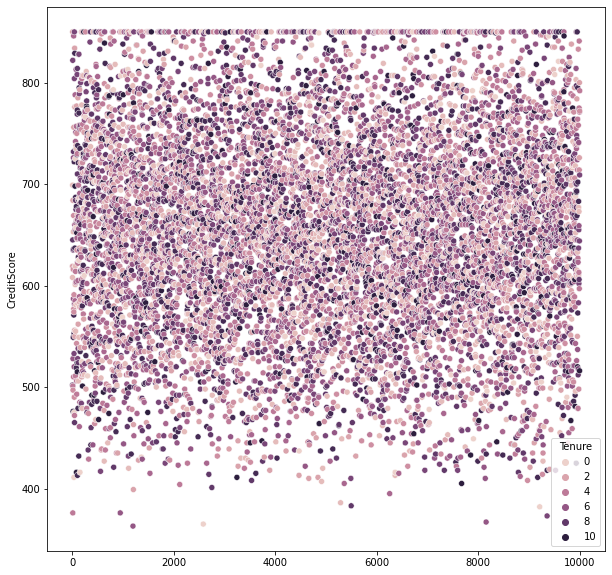

In [34]:
# removing outliers
median = df.loc[df['CreditScore']>359, 'CreditScore'].median()
df.loc[df.CreditScore <360, 'CreditScore'] = median

# plot after removing outliers
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.index,y=df['CreditScore'],hue=df['Tenure'])

In [19]:
# encoding categorical values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Geography']=label_encoder.fit_transform(df['Geography'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [52]:
# dependent variable is 'excited'
y = df['Exited']
X = df.drop(['Exited'],axis=1)

# scaling for only the columns nescessary 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data = X[['CreditScore','Age','Balance',"EstimatedSalary"]]
scaled_data=std_scaler.fit_transform(data)
X[['CreditScore','Age','Balance',"EstimatedSalary"]]=scaled_data
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,-0.329963,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,2,15647311,Hill,-0.444214,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,3,15619304,Onio,-1.545179,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,4,15701354,Boni,0.500954,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,5,15737888,Mitchell,2.069309,2,0,0.388871,2,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.248779,0,1,0.007457,5,-1.225848,2,1,0,-0.066419
9996,9997,15569892,Johnstone,-1.399769,0,1,-0.373958,10,-0.306379,1,1,1,0.027988
9997,9998,15584532,Liu,0.604818,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643
9998,9999,15682355,Sabbatini,1.259165,1,1,0.293517,3,-0.022608,2,1,0,-0.125231


In [53]:
# Splitting into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)